# ZUNAJRAVNINSKI GRAFI (OUTERPLANAR GRAPHS)

## Navodila za uporabo programa

### Predpogoj za uporabo
Potrebno je imeti nameščen SageMath.

### Navodila za uporabo
Poganjajte vrstice po vrsti.

### Cilj naloge
Za zunajravninske grafe želimo preveriti neenakost: $\alpha_{od}(G) \le n/7$.

### Struktura programa
1. Funkcija alpha_od(G)
2. Funkcija, ki za dan graf preveri, ali je zunajravninski
3. Iskanje števila zunajravninskih grafov in preverjanje neenakosti za male $n$ ($n \le 10$)
4. Generiranje naključnega zunajravninskega grafa na n vozliščih
5. Generiranje zunajravninskih grafov in preverjanje zgornje neenakosti za grafe s številom vozlišč med $n$ in $m$
6. Pognana funkcija za $n = 1$ in $m = 50$ in izpis rezultatov

# 1. Funkcija alpha_od(G)
Za preverjanje najinega problema sva si sposodila funkcijo, ki z linearnim programom izračuna liho neodvisno množico danega grafa.
Funkcija je bila napisana v prejšnji skupini projektov.

In [3]:
def alpha_od(G):
    """
    Compute the size of the maximum odd independent set in the graph G.
    """
    from sage.numerical.mip import MixedIntegerLinearProgram
    
    n = G.order()
    V = G.vertices()
    
    # Create the mixed integer linear program
    mip = MixedIntegerLinearProgram(maximization=True)
    
    # Define variables
    x = mip.new_variable(binary=True) # Indicator if vertex v is in the independent set
    y = mip.new_variable(binary=True) # Indicator if vertex v has neighbors in the independent set
    z = mip.new_variable(integer=True) # Counter for the vertex v
    
    # Objective function
    mip.set_objective(mip.sum(x[v] for v in V))
    
    # Constraints
    for u, v in G.edges(labels=False):
        mip.add_constraint(x[u] + x[v] <= 1)
        
    for u in V:
        sum_neighbors = mip.sum(x[v] for v in G.neighbors(u))
        mip.add_constraint(sum_neighbors <= n * y[u])
        mip.add_constraint(y[u] + sum_neighbors == 2*z[u])
    
    # Solve the MIP
    return int(mip.solve())

Preverimo delovanje funkcije:

In [2]:
from sage.all import Graph
from sage.graphs.graph_generators import graphs

P4 = graphs.PathGraph(4)
C4 = graphs.CycleGraph(4)
C5 = graphs.CycleGraph(5)

for name, G in [("P4", P4), ("C4", C4), ("C5", C5)]:
    print(name, "alpha_od =", alpha_od(G))

P4 alpha_od = 2
C4 alpha_od = 1
C5 alpha_od = 1


# 2. Funkcija, ki za dan graf preveri, ali je zunajravninski

Uporabimo lahko vgrajeno metodo *is_circular_planar*, saj za vsak zunajravninski graf velja, da ga lahko narišemo kot circular planar - krožno ravninski graf.

In [4]:
def preveri_outerplanarnost(G):
    if G.is_directed():
        raise ValueError("Pričakovan je neusmerjen graf.")
    if G.has_loops() or G.has_multiple_edges():
        raise ValueError("Graf mora biti enostaven.")

    return G.is_circular_planar()

Preverimo funkcijo na nekaj grafih.

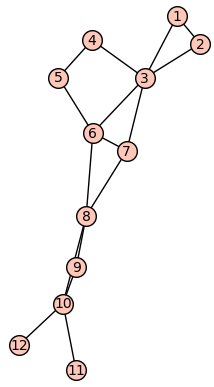

Graf G je outerplanaren.


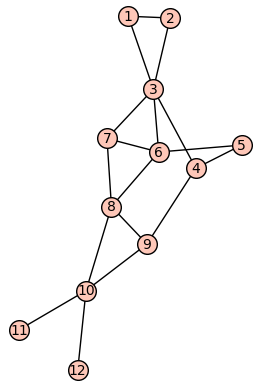

Graf F ni outerplanaren.


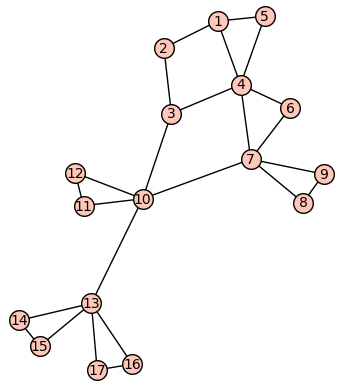

Graf H je outerplanaren.


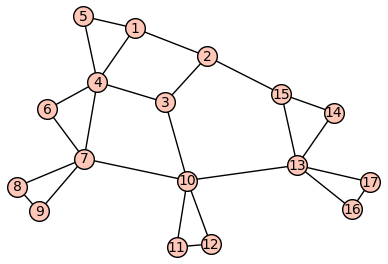

Graf I ni outerplanaren.


In [4]:
G = Graph({1:[2,3],2:[1,3],3:[4,6,7],4:[3,5],5:[4,6],6:[3,5,7],7:[3,6,8],8:[6,7,9,10],9:[8,10],10:[8,9,11,12],11:[10],12:[10]})
F = Graph({1:[2,3],2:[1,3],3:[4,6,7],4:[3,5,9],5:[4,6],6:[3,5,7],7:[3,6,8],8:[6,7,9,10],9:[4,8,10],10:[8,9,11,12],11:[10],12:[10]})
H = Graph({1:[2,4,5],2:[1,3],3:[2,10],4:[1,3,5,6,7],5:[1,4],6:[4,7],7:[4,6,8,9,10],8:[7,9],9:[7,8],
           10:[3,7,11,12,13],11:[10,12],12:[10,11],13:[10,14,15,16,17],14:[13,15],15:[13,14],16:[13,17],17:[13,16]})
I = Graph({1:[2,4,5],2:[1,3,15],3:[2,10],4:[1,3,5,6,7],5:[1,4],6:[4,7],7:[4,6,8,9,10],8:[7,9],9:[7,8],
           10:[3,7,11,12,13],11:[10,12],12:[10,11],13:[10,14,15,16,17],14:[13,15],15:[13,14],16:[13,17],17:[13,16]})

for ime, graf in [("G", G), ("F", F), ("H", H), ("I", I)]:
    graf.show()
    if preveri_outerplanarnost(graf):
        print(f"Graf {ime} je outerplanaren.")
    else:
        print(f"Graf {ime} ni outerplanaren.") 
    

# 2. Iskanje števila zunajravninskih grafov in preverjanje neenakosti za male $n$ ($n \le 10$)

Najprej želimo dobiti seznam vseh zunajravninskih grafov na n vozliščih. Za hitrejše delovanje funkcije bomo uporabili program *Plantri*, ki nam omogoča dostop do vseh ravninskih grafov, kar občutno zmanjša časovno zahtevnost programa. Za hitrejšo izvedbo pa tudi uporabimo kanoničen zapis za grafe, kar nam omogoča, da ni potrebno dodatno preverjati izomorfnost grafov.

In [5]:
def outerplanar_graphs(n):
    OP = []
    seen = set()

    if n == 1:
        return [Graph({1:[]})]

    for G in graphs.planar_graphs(n):
        if G.size() > 2*n - 3:
            continue
        if preveri_outerplanarnost(G):
            canon = G.canonical_label()
            if canon.graph6_string() not in seen:
                seen.add(canon.graph6_string())
                OP.append(canon)
    return OP

In [7]:
for n in range(1, 11):
    if n == 1:
        print(f"Število zunajravninskih grafov na {n} vozlišču je 1.")
    else:
        print(f"Število zunajravninskih grafov na {n} vozliščih je {len(outerplanar_graphs(n))}.")


Število zunajravninskih grafov na 1 vozlišču je 1.
Število zunajravninskih grafov na 2 vozliščih je 1.
Število zunajravninskih grafov na 3 vozliščih je 2.
Število zunajravninskih grafov na 4 vozliščih je 5.
Število zunajravninskih grafov na 5 vozliščih je 13.
Število zunajravninskih grafov na 6 vozliščih je 46.
Število zunajravninskih grafov na 7 vozliščih je 172.
Število zunajravninskih grafov na 8 vozliščih je 777.
Število zunajravninskih grafov na 9 vozliščih je 3783.
Število zunajravninskih grafov na 10 vozliščih je 20074.


Za prvih nekaj n se zgornja koda izvede v nekaj sekundah, pri n = 9 traja slabi 2 minuti, za n = 10 pa že približno 30 minut.

In [ ]:
def prikazi_grafe(n, k):
    """ Prikaže naključno izbranih k zunajravninskih grafov na n vozliščih. """
    
    from random import sample
    
    grafi = sample(outerplanar_graphs(n), k)
    print(f"{k} zunajravninskih grafov na {n} vozliščih:")
    for G in grafi:
        alpha = alpha_od(G)
        G.show()
        print(f"alpha_od = {alpha}")

5 zunajravninskih grafov na 10 vozliščih:


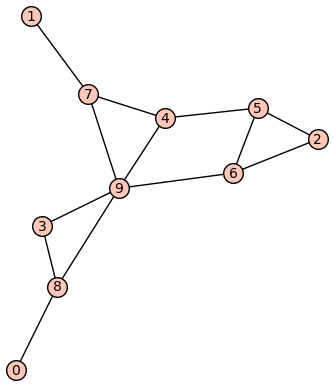

alpha_od = 3


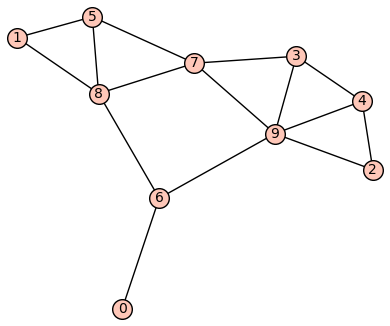

alpha_od = 3


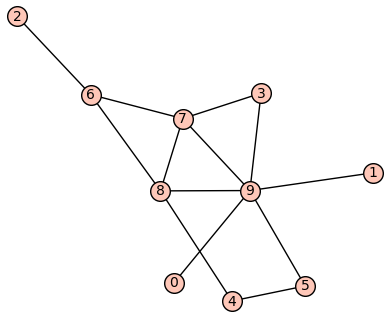

alpha_od = 5


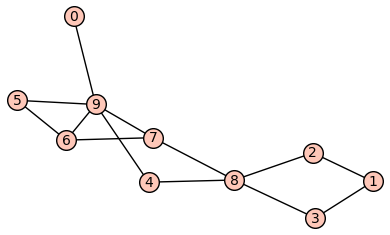

alpha_od = 4


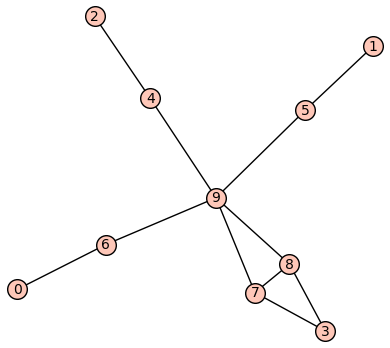

alpha_od = 4


In [8]:
prikazi_grafe(10, 5)

Shranimo vse zunajravninske grafe na $n \le 10$ vozliščih. 

In [17]:
slovar_zunajravninskih_grafov = {n: outerplanar_graphs(n) for n in range(1, 11)}

In [21]:
len(slovar_zunajravninskih_grafov[10])

20074

In [ ]:
def check_alpha_do_n(max_n=10):
    """ 
    Funkcija preveri neenakost alpha_od(G) >= n/7 za vse zunajravninske grafe do n=10 vozlišč.
    """
    for n, OP in slovar_zunajravninskih_grafov.items():
        for G in OP:
            alpha = alpha_od(G)
            if alpha < n / 7:
                print("Protiprimer najden!")
                print(f"n = {n}")
                print(f"alpha_od(G) = {alpha} < {n}/7")
                G.show()
                return False
            
        print(f"Vsi grafi za n = {n} zadoščajo neenakosti.")



In [25]:
check_alpha_do_n(10)

Vsi grafi za n = 1 zadoščajo neenakosti.
Vsi grafi za n = 2 zadoščajo neenakosti.
Vsi grafi za n = 3 zadoščajo neenakosti.
Vsi grafi za n = 4 zadoščajo neenakosti.
Vsi grafi za n = 5 zadoščajo neenakosti.
Vsi grafi za n = 6 zadoščajo neenakosti.
Vsi grafi za n = 7 zadoščajo neenakosti.
Vsi grafi za n = 8 zadoščajo neenakosti.
Vsi grafi za n = 9 zadoščajo neenakosti.
Vsi grafi za n = 10 zadoščajo neenakosti.


Poglejmo si sedaj za vsak $n$, koliko je takih grafov, ki imajo minimalno število $\alpha_{od}$.

In [38]:
def grafi_z_min_alpha(slovar_grafov, n_max=10):
    """
    Za vsak n = 1,...,n_max izpiše in vrne število zunajravninskih grafov,
    ki imajo minimalni alpha_od za ta n.
    """
    rezultat = {}

    for n in range(1, n_max + 1):
        grafi = slovar_grafov[n]
        vrednosti = [alpha_od(G) for G in grafi]
        min_alpha = min(vrednosti)
        stevilo = sum(1 for a in vrednosti if a == min_alpha)
        rezultat[n] = (min_alpha, stevilo)

        print(
            f"n = {n}: "
            f"min alpha_od = {min_alpha}, "
            f"število grafov = {stevilo}"
        )


In [39]:
grafi_z_min_alpha(slovar_zunajravninskih_grafov, n_max=10)

n = 1: min alpha_od = 1, število grafov = 1
n = 2: min alpha_od = 1, število grafov = 1
n = 3: min alpha_od = 1, število grafov = 2
n = 4: min alpha_od = 1, število grafov = 3
n = 5: min alpha_od = 1, število grafov = 5
n = 6: min alpha_od = 1, število grafov = 4
n = 7: min alpha_od = 1, število grafov = 2
n = 8: min alpha_od = 2, število grafov = 204
n = 9: min alpha_od = 2, število grafov = 428
n = 10: min alpha_od = 2, število grafov = 687


In [42]:
import random

def narisi_nakljucni_ekstremni_graf(slovar_grafov, n_min, n_max=10):
    """
    Funkcija, ki za vsak n v intervalu [n_min, n_max] naključno izbere en zunajravninski graf
    z minimalnim alpha_od in ga nariše.
    """
    for n in range(n_min, n_max + 1):
        grafi = slovar_grafov[n]

        vrednosti = [(G, alpha_od(G)) for G in grafi]
        min_alpha = min(a for graf, a in vrednosti)

        minimalni_a = [G for G, a in vrednosti if a == min_alpha]

        G_rand = random.choice(minimalni_a)

        print(f"\n=== n = {n} ===")
        print(f"min alpha_od = {min_alpha}")
        print(f"število takih grafov = {len(minimalni_a)}")
        print("naključno izbran graf:")

        G_rand.show()



=== n = 6 ===
min alpha_od = 1
število takih grafov = 4
naključno izbran graf:


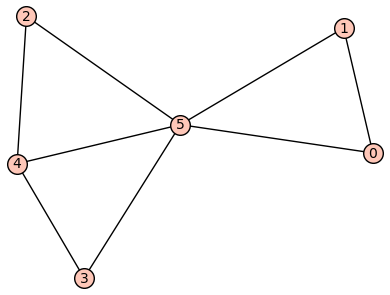


=== n = 7 ===
min alpha_od = 1
število takih grafov = 2
naključno izbran graf:


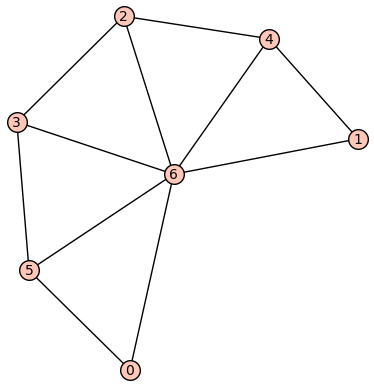


=== n = 8 ===
min alpha_od = 2
število takih grafov = 204
naključno izbran graf:


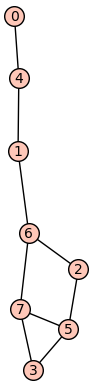


=== n = 9 ===
min alpha_od = 2
število takih grafov = 428
naključno izbran graf:


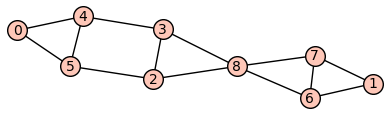


=== n = 10 ===
min alpha_od = 2
število takih grafov = 687
naključno izbran graf:


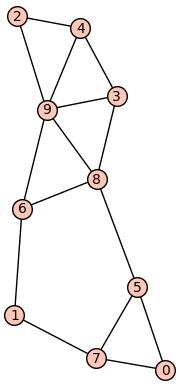

In [43]:
narisi_nakljucni_ekstremni_graf(slovar_zunajravninskih_grafov, n_min=6, n_max=10)

# 4. Generiranje naključnega zunajravninskega grafa na n vozliščih

In [1]:
from sage.graphs.graph import Graph
import random

# 1) BLOK: NAKLJUČEN MAKSIMALEN OUTERPLANARNI GRAF (TRIANGULACIJA POLIGONA)

def _random_maximal_outerplanar(m, seed=None):
    """
    Ustvari naključen maksimalen outerplanarni graf na m vozliščih (m >= 3).

    Kaj pomeni "maksimalen outerplanaren"?
    - Graf je outerplanaren (ima risbo brez presekanj, kjer so vsa vozlišča na zunanjem licu).
    - Je maksimalen: nobenega dodatnega roba ne moreš dodati, da bi ostal outerplanaren.
      Ekvivalentno: predstavlja triangulacijo m-kotnika (poligona).

    Konstrukcija ("dodaj uho"):
    - Začnemo s trikotnikom.
    - Dokler ne dobimo m vozlišč:
        * izberemo naključni rob na trenutnem zunanjem ciklu (a,b)
        * med a in b na zunanjem ciklu "vstavimo" nov vrh v
        * dodamo roba (a,v) in (v,b)
      S tem vedno ohranimo outerplanarnost in maksimalnost.

    Vrne:
    - G: Graph na vozliščih 0..m-1
    - outer: seznam vrhov v vrstnem redu po zunanjem ciklu
    """
    if m < 3:
        raise ValueError("m mora biti >= 3 (najmanj trikotnik).")

    rng = random.Random(seed)

    # Ustvarimo prazen graf z vozlišči 0..m-1
    G = Graph()
    G.add_vertices(range(m))

    # Začetni trikotnik: 0-1-2-0
    G.add_edges([(0, 1), (1, 2), (2, 0)])

    # Zunanji cikel (outer face) v tem trenutku: 0,1,2
    outer = [0, 1, 2]

    # Dodajamo nova vozlišča 3..m-1
    for v in range(3, m):
        k = len(outer)

        # Naključno izberemo "zunanji rob" (a,b), kjer b sledi a v seznamu outer
        i = rng.randrange(k)
        a = outer[i]
        b = outer[(i + 1) % k]

        # Vstavimo v med a in b v zunanjem vrstnem redu
        outer.insert(i + 1, v)

        # Dodamo roba, ki tvorita novo "uho" (trikotnik a-v-b)
        # Rob (a,b) je že del zunanjega cikla in že obstaja.
        G.add_edge(a, v)
        G.add_edge(v, b)

    return G, outer


# ======================================================================
# 2) REDČENJE BLOKA: ODSTRANI DEL DIAGONAL, A OHRANI ZUNANJI CIKEL
# ======================================================================
def _sparsify_keep_outer_cycle(G, outer_order, remove_prob=0.2, seed=None):
    """
    Naključno odstrani del diagonal v outerplanarnem bloku,
    vendar ohrani robove zunanjega cikla.

    Zakaj:
    - maksimalen outerplanarni graf (triangulacija) ima veliko robov (~2m-3).
    - če želiš "bolj redek" outerplanarni graf, odstraniš nekaj diagonal.
    - odstranjevanje robov ohranja outerplanarnost.

    Parametri:
    - G: outerplanaren graf, običajno maksimalen
    - outer_order: vrstni red vrhov zunanjega cikla
    - remove_prob: verjetnost odstranitve posamezne diagonale (rob, ki NI na ciklu)
    - seed: seed za ponovljivost

    Vrne:
    - G (isti objekt, spremenjen in-place)
    """
    if remove_prob <= 0:
        return G

    rng = random.Random(seed)

    # Zgradimo množico robov, ki so na zunanjem ciklu (teh ne smemo odstraniti)
    outer_edges = set()
    k = len(outer_order)
    for i in range(k):
        u = outer_order[i]
        v = outer_order[(i + 1) % k]
        outer_edges.add(tuple(sorted((u, v))))

    # Kandidati za odstranitev = robovi, ki niso na zunanjem ciklu (diagonale)
    diagonals = []
    for (u, v) in G.edges(labels=False):
        e = tuple(sorted((u, v)))
        if e not in outer_edges:
            diagonals.append((u, v))

    # Vsako diagonalo odstranimo z verjetnostjo remove_prob
    for (u, v) in diagonals:
        if rng.random() < remove_prob:
            G.delete_edge(u, v)

    return G


# ======================================================================
# 3) GLAVNA FUNKCIJA: OUTERPLANARNI GRAF NA n VOZLIŠČIH Z VEČ BLOKI
# ======================================================================
def random_outerplanar_graph(
    n,
    *,
    min_block_size=3,
    max_block_size=None,
    expected_blocks=None,
    remove_prob=0.25,
    seed=None
):
    """
    Generira naključen outerplanarni graf na n vozliščih.

    Glavna ideja:
    1) Najprej naredimo en 2-povezan outerplanarni blok
       (cikel + nekrižajoče diagonale, v praksi triangulacija + optional redčenje).
    2) Nato dodajamo nove bloke in jih lepimo v "drevo blokov":
       vsak nov blok deli NATANKO ENO vozlišče z že zgrajenim grafom.
       To skupno vozlišče je rezno (cut-vertex).
    3) Takšno lepljenje ohranja outerplanarnost.

    Parametri:
    - n: število vozlišč (n >= 1)
    - min_block_size: minimalna velikost 2-povezanega bloka (>=3)
    - max_block_size: maksimalna velikost bloka (None -> n)
    - expected_blocks: heuristika za približno število blokov
    - remove_prob: verjetnost odstranitve diagonal znotraj vsakega bloka
    - seed: seed za ponovljivost

    Vrne:
    - Graph (Sage) na vozliščih 0..n-1
    """
    if n <= 0:
        raise ValueError("n mora biti >= 1.")

    rng = random.Random(seed)

    # --- majhni primeri: vedno outerplanarno ---
    if n == 1:
        G = Graph()
        G.add_vertex(0)
        return G

    if n == 2:
        return Graph([(0, 1)])

    if n < min_block_size:
        # pot (path) na n vozliščih je outerplanarna
        G = Graph()
        G.add_vertices(range(n))
        G.add_edges([(i, i + 1) for i in range(n - 1)])
        return G

    # Nastavimo maksimalno velikost bloka
    if max_block_size is None:
        max_block_size = n
    max_block_size = max(max_block_size, min_block_size)

    # ------------------------------------------------------------
    # A) IZDELAMO PRVI BLOK
    # ------------------------------------------------------------
    # Heuristika: če uporabnik poda expected_blocks, približno ciljamo na povprečno velikost blokov
    if expected_blocks is not None and expected_blocks >= 1:
        avg = max(min_block_size, min(max_block_size, (n + expected_blocks - 1) // expected_blocks))
        s1 = rng.randint(min_block_size, min(max_block_size, max(min_block_size, 2 * avg)))
        s1 = max(min_block_size, min(s1, n))
    else:
        s1 = rng.randint(min_block_size, min(max_block_size, n))

    # Naredimo maksimalen outerplanarni blok in ga po želji razredčimo
    B, outer = _random_maximal_outerplanar(s1, seed=rng.randrange(10**18))
    _sparsify_keep_outer_cycle(B, outer, remove_prob=remove_prob, seed=rng.randrange(10**18))

    # Začnemo končni graf s prvim blokom; ta že uporablja oznake 0..s1-1
    G_final = B
    next_new_vertex = s1  # naslednja prosta oznaka vozlišča

    # ------------------------------------------------------------
    # B) DODAJAMO BLOKE, DOKLER NE DOSEŽEMO n VOZLIŠČ
    # ------------------------------------------------------------
    # Vsak nov blok velikosti t doda (t-1) novih vozlišč, ker 1 vozlišče deli z G_final.
    while next_new_vertex < n:
        remaining = n - next_new_vertex

        # Največji možni blok: doda (t-1) novih vozlišč <= remaining  =>  t <= remaining + 1
        t_max = min(max_block_size, remaining + 1)
        t_min = min_block_size

        # Če nimamo več prostora za blok velikosti >=3, preostanek dodamo kot verigo (drevesno)
        if t_max < t_min:
            attach = rng.choice(G_final.vertices())
            for _ in range(remaining):
                v = next_new_vertex
                G_final.add_vertex(v)
                G_final.add_edge(attach, v)
                attach = v
                next_new_vertex += 1
            break

        # Izberemo velikost bloka (lahko rahlo biasiramo, če je expected_blocks podan)
        if expected_blocks is not None:
            blocks_left = max(1, expected_blocks - 1)  # zelo groba ocena
            avg = max(min_block_size, min(t_max, (remaining + blocks_left) // blocks_left))
            t = rng.randint(min_block_size, min(t_max, max(min_block_size, 2 * avg)))
        else:
            t = rng.randint(t_min, t_max)

        # Ustvarimo nov blok na lokalnih vozliščih 0..t-1
        B, outer = _random_maximal_outerplanar(t, seed=rng.randrange(10**18))
        _sparsify_keep_outer_cycle(B, outer, remove_prob=remove_prob, seed=rng.randrange(10**18))

        # Izberemo vozlišče v že zgrajenem grafu, na katerega bomo blok prilepili
        glue_global = rng.choice(G_final.vertices())

        # V bloku izberemo lokalni "glue" vrh (enostavno: 0)
        glue_local = 0

        # Preslikava oznak:
        # - glue_local postane glue_global (to je skupno vozlišče)
        # - ostali vrhovi dobijo nove oznake next_new_vertex, next_new_vertex+1, ...
        mapping = {}
        for v in B.vertices():
            if v == glue_local:
                mapping[v] = glue_global
            else:
                mapping[v] = next_new_vertex
                next_new_vertex += 1

        B = B.relabel(mapping, inplace=False)

        # Združimo (union) robove novega bloka s trenutnim grafom
        G_final.add_vertices([v for v in B.vertices() if v not in G_final])
        G_final.add_edges(B.edges(labels=False))

    # Končno: poskrbimo, da graf vsebuje točno vozlišča 0..n-1
    G_final.add_vertices(range(n))
    return G_final

Preverimo delovanje funkcije za n = 17

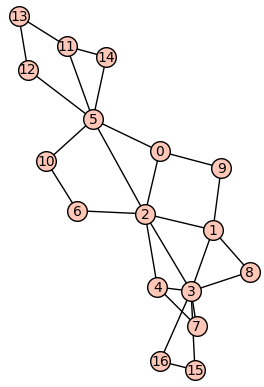

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!


In [4]:
G = random_outerplanar_graph(17)
G.show()
t = G.is_circular_planar()
status = "JE outerplanaren" if t else "NI outerplanaren"
print(f"Graf G {status}!")
alpha = alpha_od(G)
if alpha >= G.order()/7:
    print("alpha_od(G) JE večja ali enaka n/7!")
else:
    print("alpha_od(G) NI večja ali enaka n/7!")    

# 5. Generiranje zunajravninskih grafov in preverjanje zgornje neenakosti za grafe s številom vozlišč med $n$ in $m$

In [5]:
def test_outerplanar_alpha_range(n_min, n_max, *, seed=None):
    """
    Za vsak n v intervalu [n_min, n_max] naredi:
      - generira random_outerplanar_graph(n)
      - prikaže graf
      - preveri outerplanarnost
      - izračuna alpha_od
      - preveri pogoj alpha_od >= n/7
    """
    import random
    rng = random.Random(seed)

    for n in range(n_min, n_max + 1):

        print("\n" + "=" * 14)
        print(f"Test za n = {n}")
        print("=" * 14)

        # generiranje grafa
        G = random_outerplanar_graph(n, seed=rng.randrange(10**18))

        # risanje
        G.plot().show()

        # outerplanarnost
        t = G.is_circular_planar()
        status = "JE outerplanaren" if t else "NI outerplanaren"
        print(f"Graf G {status}!")

        # alpha_od
        alpha = alpha_od(G)
        threshold = G.order() / 7
        # preverjanje pogoja
        if alpha >= threshold:
            print("alpha_od(G) JE večja ali enaka n/7!")
        else:
            print("alpha_od(G) NI večja ali enaka n/7!")

# 6. Pognana funkcija za $n=1$ in $m=50$ in izpis rezultatov


Test za n = 1


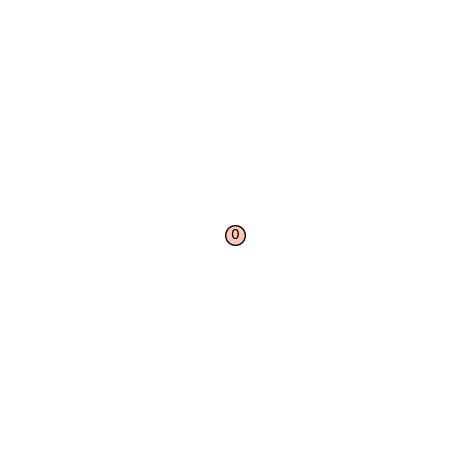

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 2


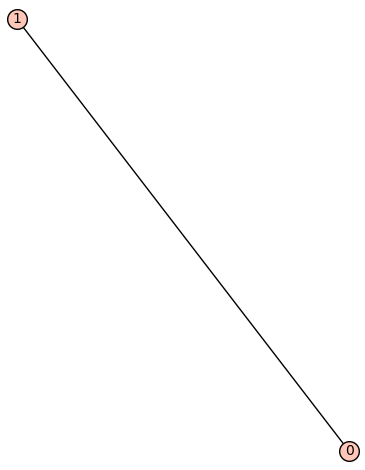

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 3


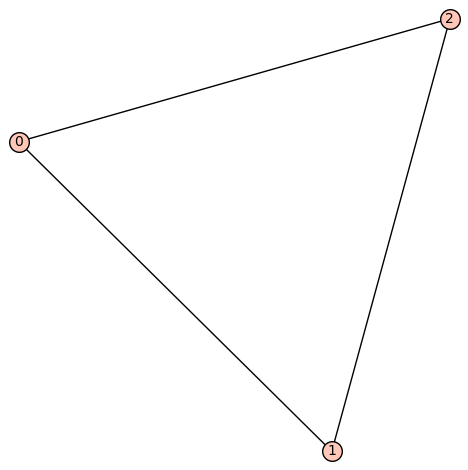

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 4


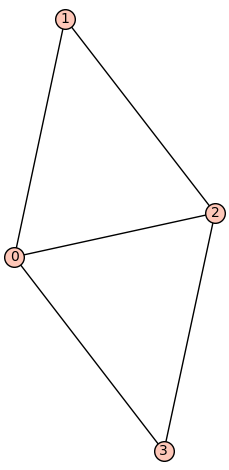

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 5


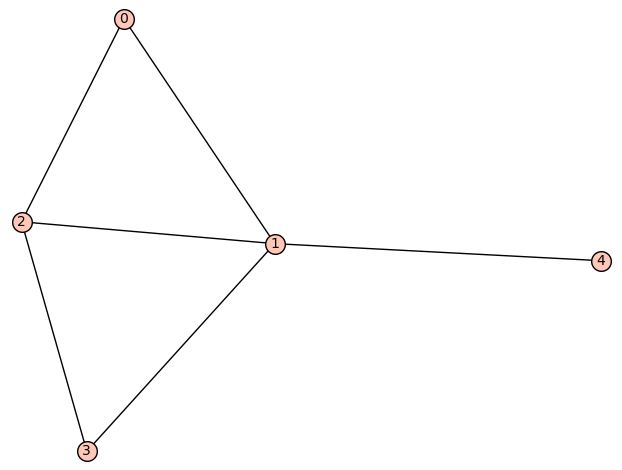

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 6


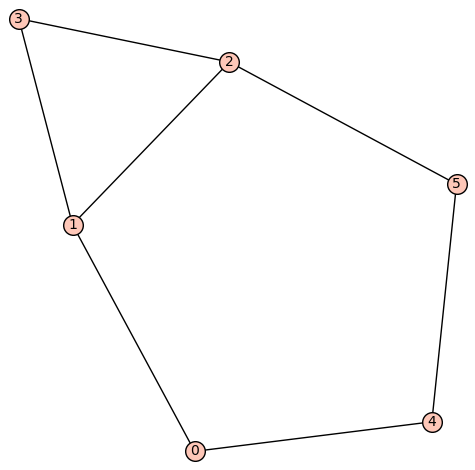

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 7


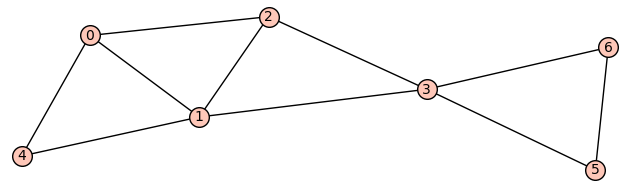

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 8


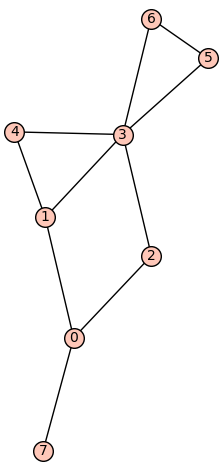

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 9


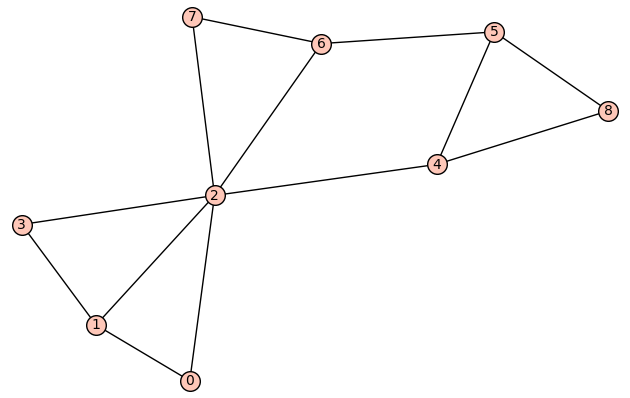

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 10


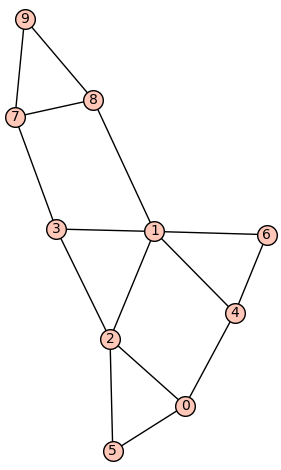

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 11


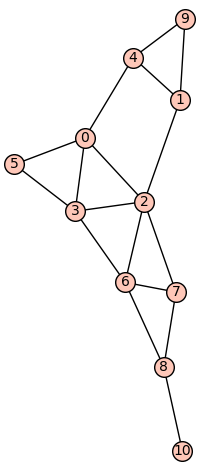

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 12


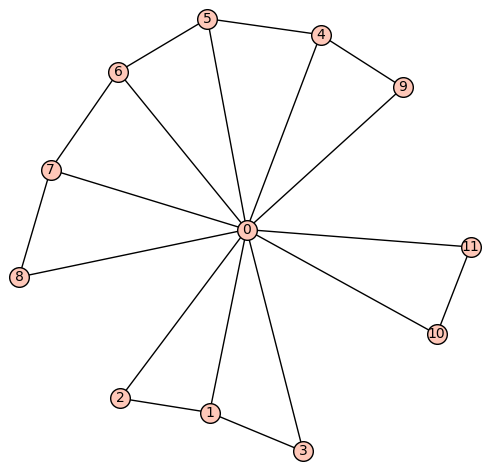

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 13


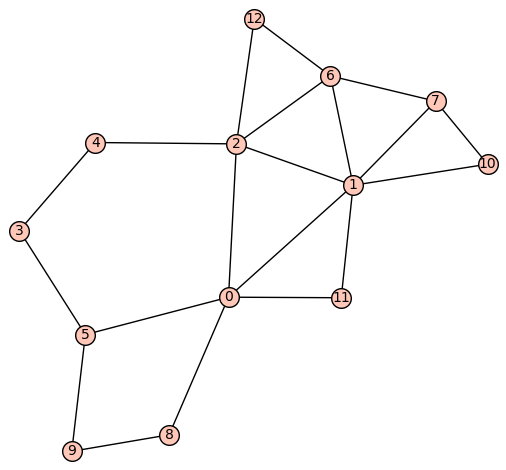

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 14


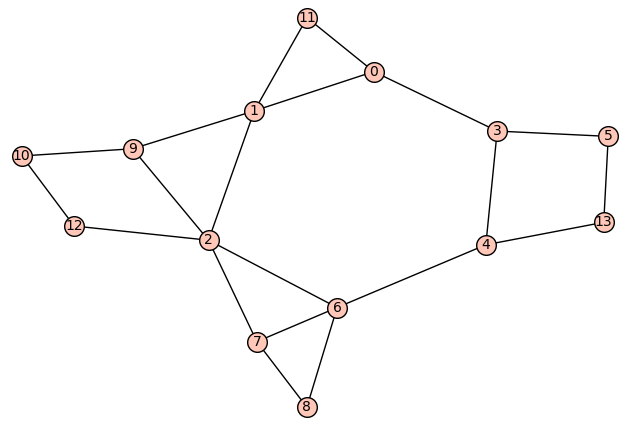

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 15


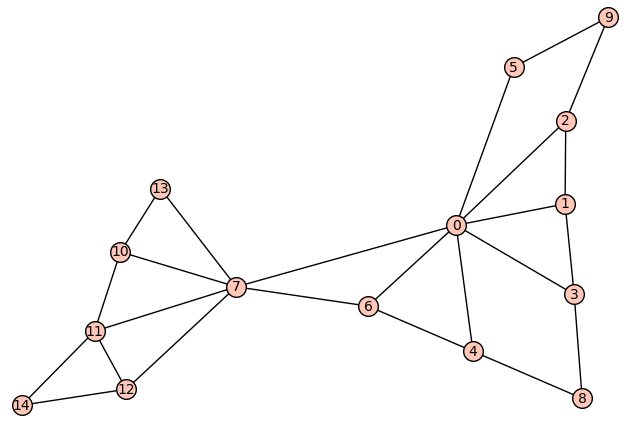

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 16


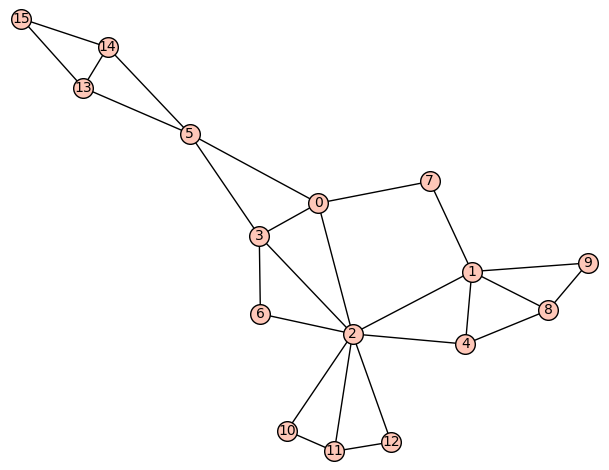

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 17


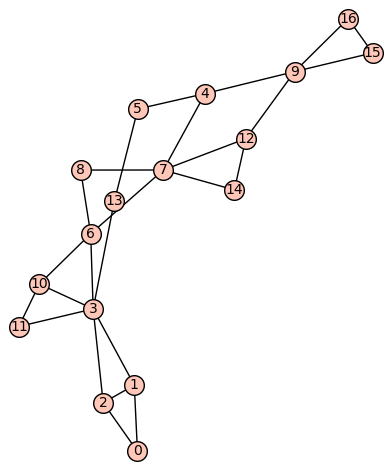

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 18


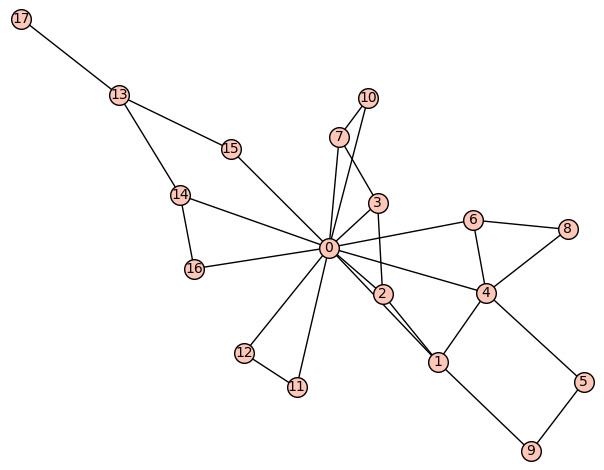

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 19


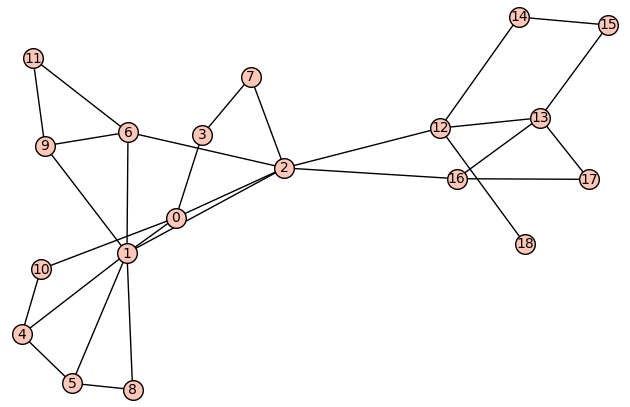

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 20


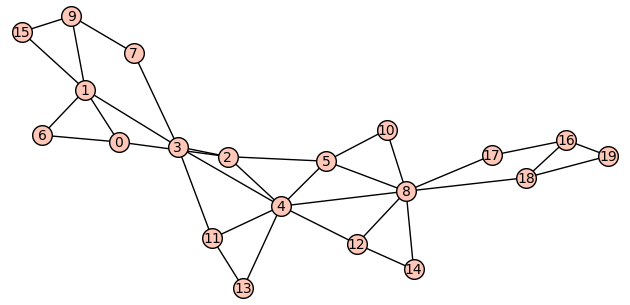

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 21


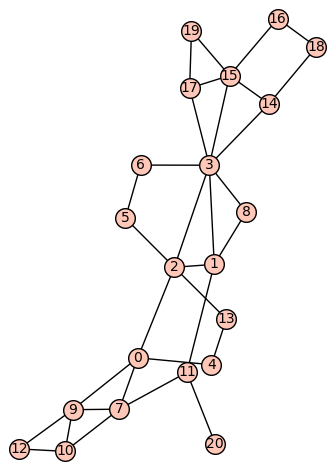

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 22


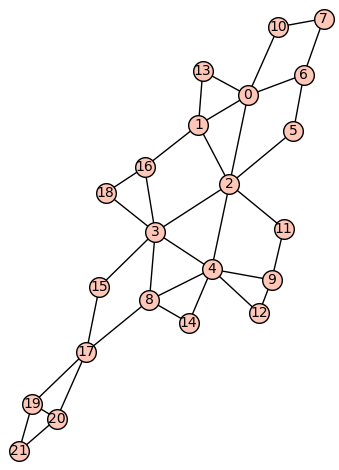

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 23


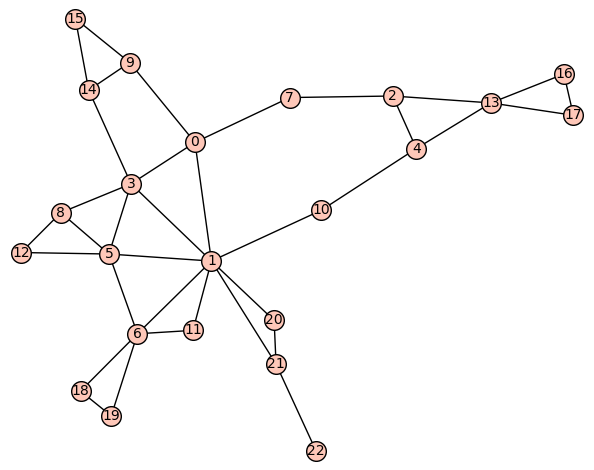

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 24


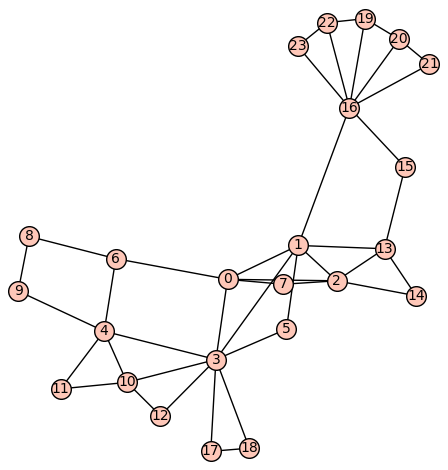

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 25


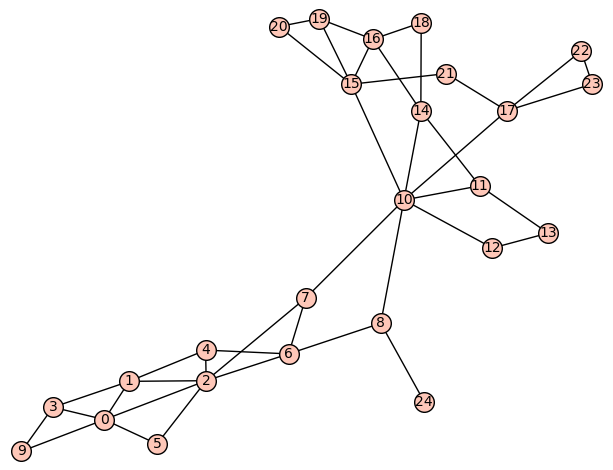

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 26


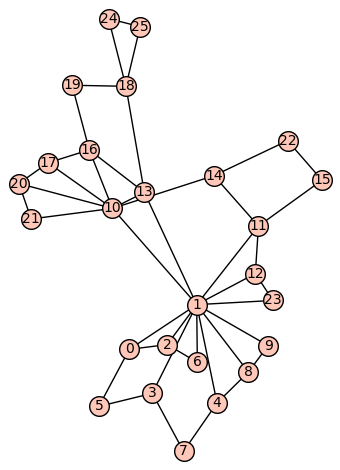

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 27


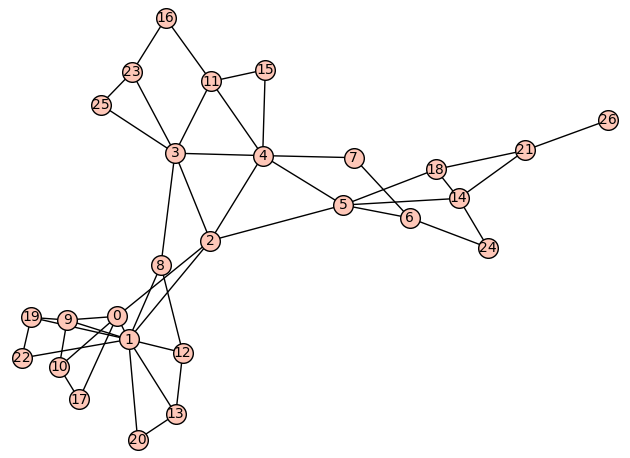

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 28


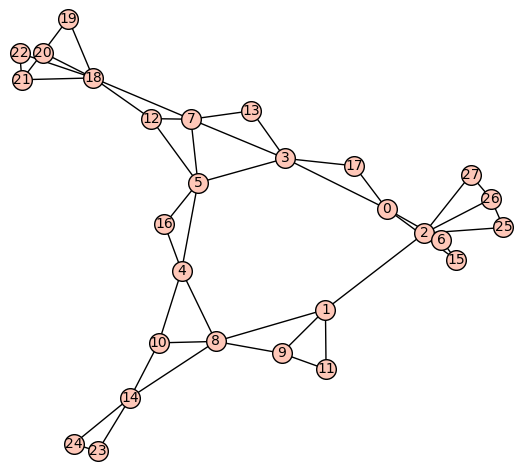

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 29


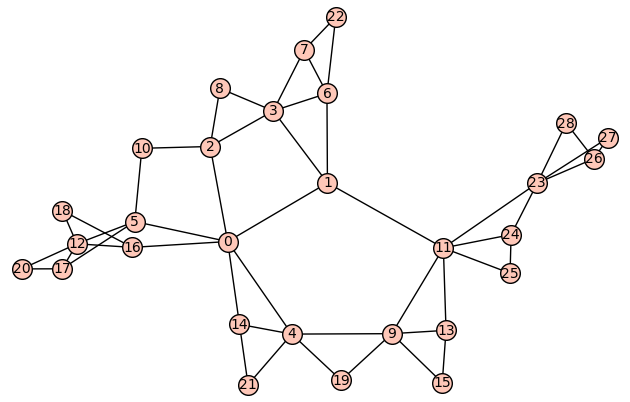

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 30


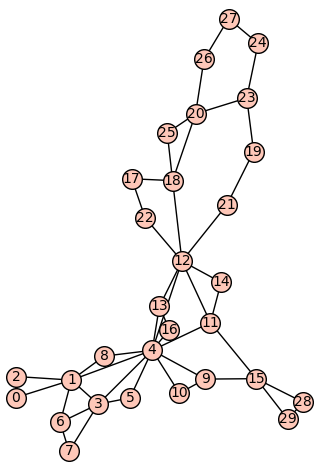

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 31


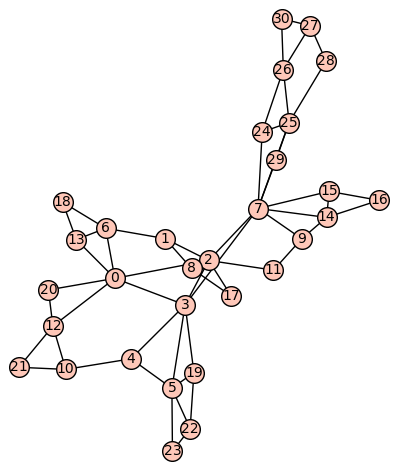

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 32


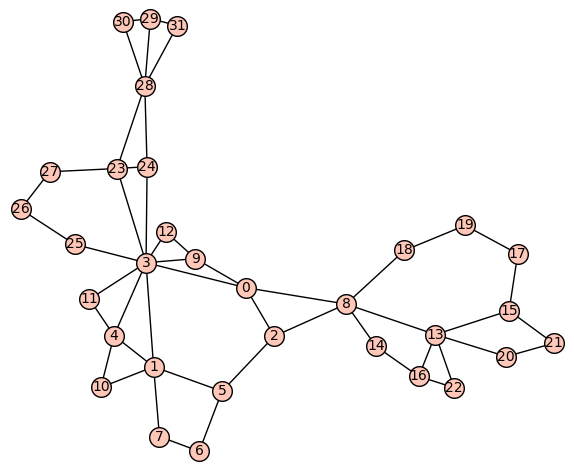

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 33


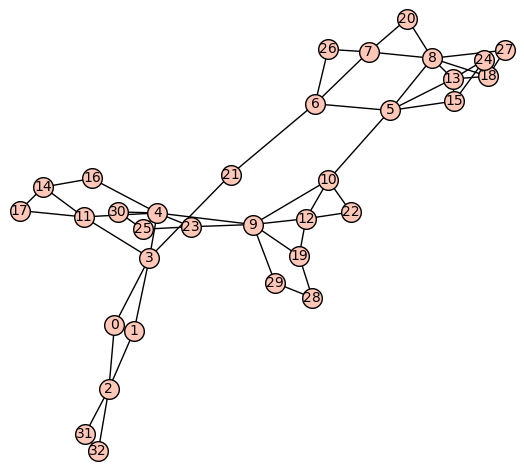

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 34


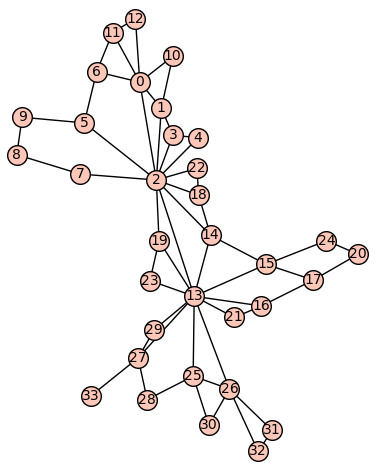

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 35


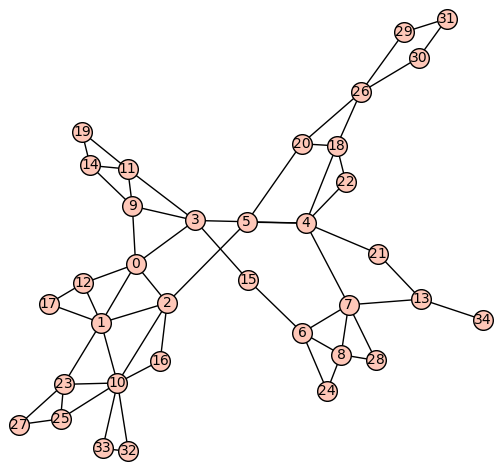

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 36


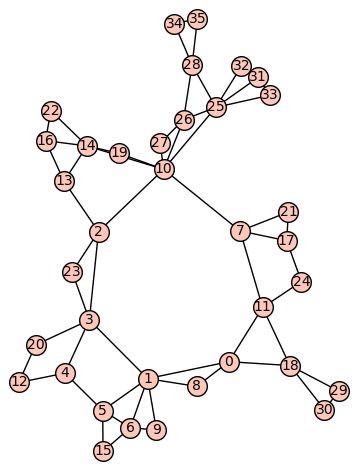

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 37


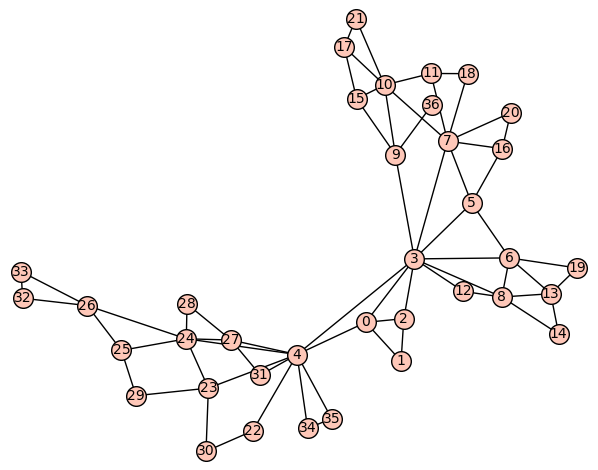

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 38


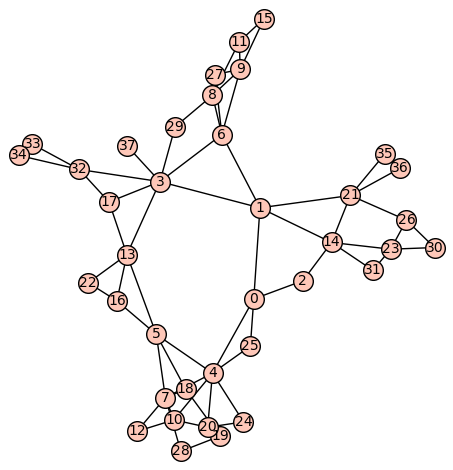

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 39


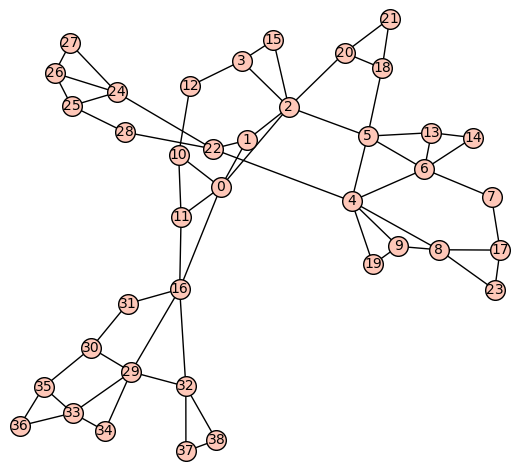

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 40


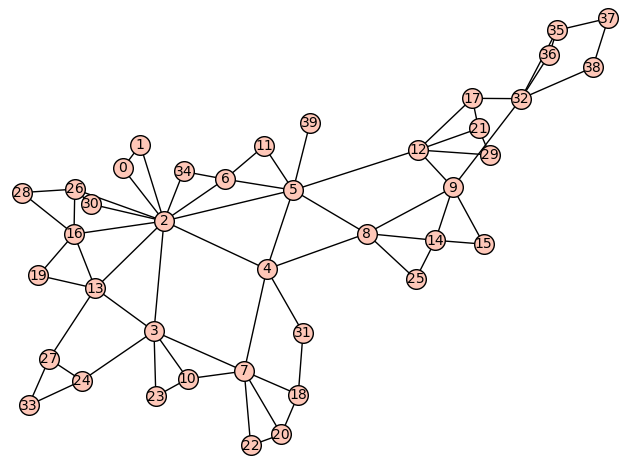

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 41


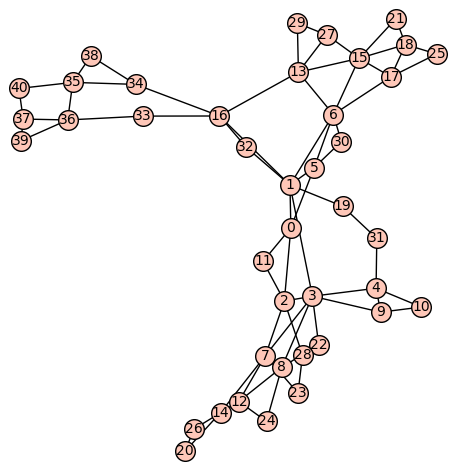

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 42


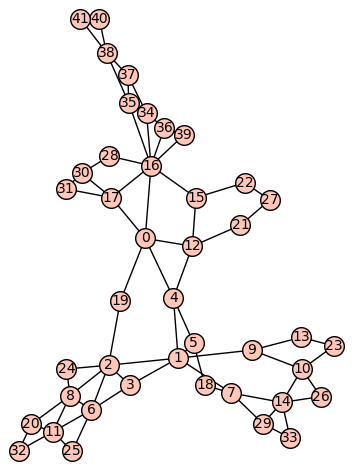

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 43


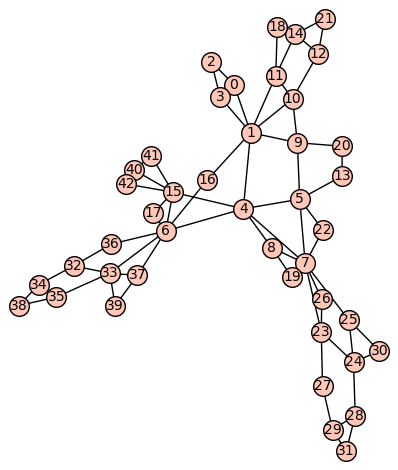

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 44


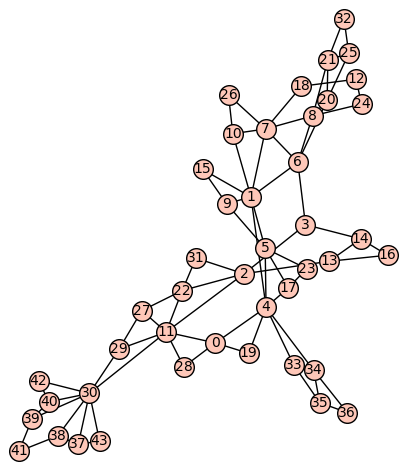

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 45


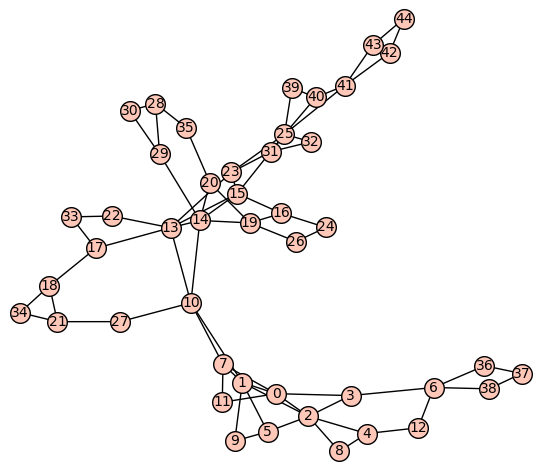

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 46


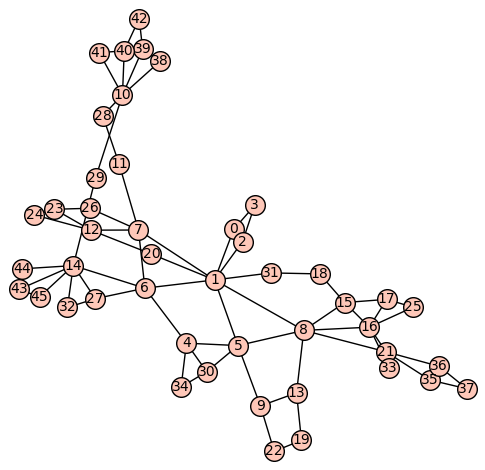

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 47


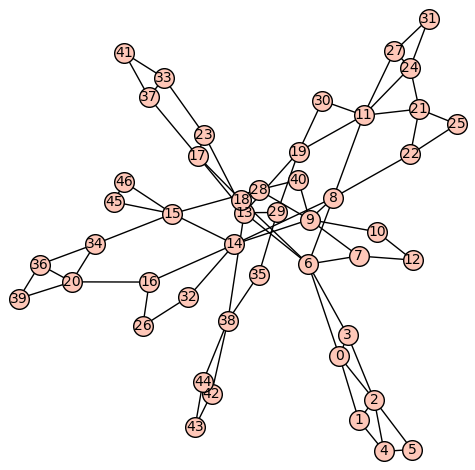

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 48


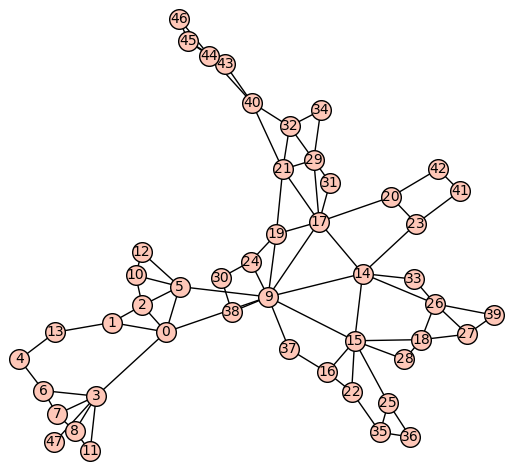

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 49


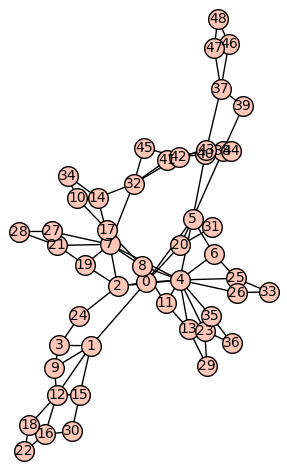

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 50


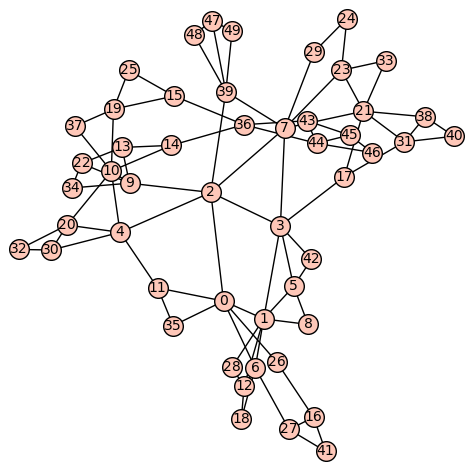

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!


In [7]:
test_outerplanar_alpha_range(1, 50)